# 22S1-AI6124 Fuzzy Membership Functions Assignment 3
Created by A/Prof Kai Keng ANG (kkang@i2r.a-star.edu.sg, kkang@ntu.edu.sg). Last modified 5 Oct 2022

Submitted by: Sean Goh Ann Ray
Mat ID: G2202190G

# Instructions
Enter your name according to NTU Learn, and your student ID above. Do not include the square brackets. Please save the file as Fuzzy_membership_[Student name].ipynb and submit in NTU Learn.

There are 10 questions in this assignment. Some questions have multiple parts. Marks for each parts are indicated in the questions. Please read the question and hints carefully. 


## Objective

After completing this tutorial assignment, you will know:

* What are the different types of membership functions
* How to use existing library to create and plot a fuzzy membership function
* How to approximate one type of membership function using another type
* How to relate python codes to equations of fuzzy membership functions
* How to implement and run the Learning Vector Quantization (LVQ) algorithm 
* How to learn a set of winning vectors (or codebook vectors) using LVQ from a training data set.
* How to make predictions using the learned vectors.
* How to form fuzzy membership functions using the learned vectors.

## Introduction

First we install the Python Fuzzy Logic library

This library is based on Octave fuzzy-logic-toolkit of which is based on Matlab R2018b Fuzzy Logic Toolbox functions. However, not all the functions are working according to Matlab implmentation. There are also other toolboxes out there, such as scikit-fuzzy.

In [1]:
!pip install -U fuzzylab

Then we import the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fuzzylab as fz
from math import sqrt
from random import randrange
from random import seed

Most common fuzzy membership functions are triangular, trapezodal, Gaussian and bell-shaped.

# 1. Triangle  Membership Function (No Qn here)

## Syntax

$y = \text{trimf$(x,[a, b, c])$}$

## Description

The triangular membership function of $x$ that depends on 3 parameters $a$, $b$, and $c$, as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $x = b$}\\ (c - x)/(c - b), &\text{for $b < x < c$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{whereby $a < b < c$}$

The parameters $a$ and $c$ define the “feet” of the triangle and the parameter $b$ defines the peak.

The following plots a triangular membership function with 3 parameters

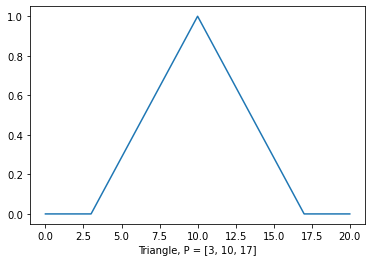

In [3]:
x = np.linspace(0, 20, 101)
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('Triangle, P = [3, 10, 17]')
plt.show()

# 2. Gaussian Membership Function (DONE)

## Syntax

$y = \text{gaussmf$(x,[a, b])$}$

## Description

The Gaussian memebership function of $x$ that depends on 2 parameters $a$, $b$, as given by

$\begin{equation} f(x;a,b)= e^\frac{-(x-b)^2}{2a^2} \end{equation}$

The parameter $a$ defines the width or standard deviation and the parameter $b$ defines the centre or mean.


<font color='red'>Question 1(a)</font>: Create a Gaussian membership function similar to the above trianglular membership function centered at 10 using gaussmf. <font color='red'>(0.5 mark)</font>


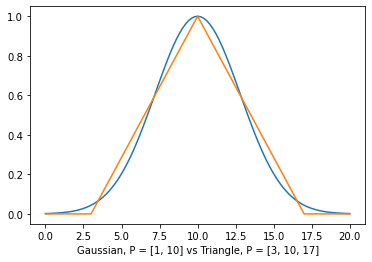

In [4]:
## Enter your code here for Question 1(a). Some codes are included for you. This code does not execute without modification (MODIFIED - DONE)
y = fz.gaussmf(x, [2.8, 10])
plt.plot(x, y)
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('Gaussian, P = [1, 10] vs Triangle, P = [3, 10, 17]')
plt.show()

# 3. Trapezoidal Membership Function (DONE)

## Syntax

$y = \text{trapmf} (x,[a, b, c, d])$

## Description

The trapezoidal curve is a function of $x$ that depends on 4 parameters $a$, $b$, $c$, and $d$, as given by

$\begin{equation} f(x;a,b,c,d)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $b \leq x \leq c$}\\ (d - x)/(d - c), &\text{for $c < x < d$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{with $a < b < c < d$}$

The parameters $a$ and $d$ define the “feet” of the trapezoid and the parameters $b$ and $c$ define the “shoulders.”


The following creates a trapezoodal membership function with 4 parameters

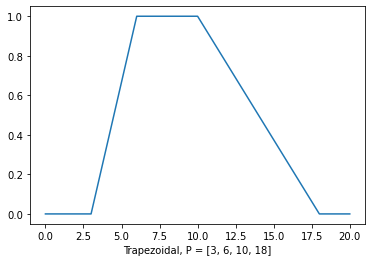

In [5]:
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('Trapezoidal, P = [3, 6, 10, 18]')
plt.show()

<font color='red'>Question 1(b)</font>: Use the function trapmf to plot a triangle membership function the same as section 1 above. <font color='red'>(0.5 mark)</font>

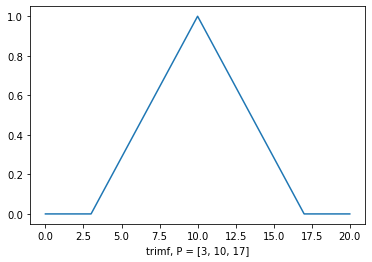

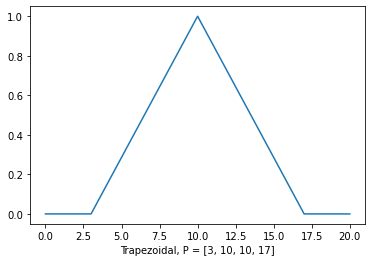

In [6]:
# Modify the code here for Question 1(b). The original code here is not correct (MODIFIED - DONE)
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('trimf, P = [3, 10, 17]')
plt.show()

y = fz.trapmf(x, [3, 10, 10, 17])
plt.plot(x, y)
plt.xlabel('Trapezoidal, P = [3, 10, 10, 17]')
plt.show()

# 4. Generalized Bell-shape Membership function (DONE)

## Syntax

$y = \text{gbellmf} (x,[a, b, c])$

## Description

The generalized bell-shaped membership function of $x$ that depends on 3 parameters $a$, $b$ and $c$ as given by

$\begin{equation} f(x;a,b,c) = \frac{1}{1 + |\frac{x-c}{a}|^{2b}} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's slopes.
- c controls the center value of the bell

<font color='red'>Question 2</font>: Give the code to plot a generalized bell-shape membership function similar to the above trapezoidal membership function in 3. You can refer to the code after question 3 for some hints on similar membership functions of different types. <font color='red'>(1 mark)</font>


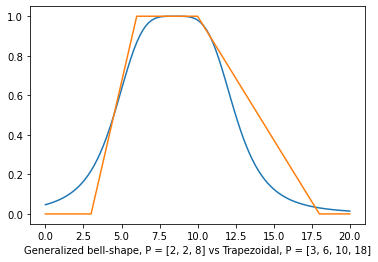

In [7]:
## Enter your code here for Question 2. Some codes are included for you. 
# This code does not execute without modification (MODIFIED - DONE)
y = fz.gbellmf(x, [4, 2, 8.5])
plt.plot(x, y)
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('Generalized bell-shape, P = [2, 2, 8] vs Trapezoidal, P = [3, 6, 10, 18]')
plt.show()

# gbellmf doesn't allow a different steepness of the curve between the left and right, 
# unlike the trapmf which allows so, thus the solution will never overlap closely to the
# trapmf with P = [3, 6, 10, 18] which has different slopes on either sides

# 5. Bell-shape Membership functions (DONE)

## Syntax

$y = \text{bellmf} (x,[a, b, c, d])$

## Description

The generalized bell-shaped membership function of $x$ that depends on 4 parameters $a$, $b$, $c$ and $d$ as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2b}}, &\text{for $x < c$} \\ \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2d}}, &\text{for $x \geq c$} \end{cases} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's left slope.
- <font color='blue'>c</font> controls the midpoint of the bell.
- d controls the gradient of the bell's right slope.

<font color='red'>Question 3</font>: bellmf function is not implemented in the Python Fuzzy Logic Library. Implement the function below. Hint: Look at gbellmf and trapmf implementation. Do not copy python code from elsewhere. <font color='red'>(1 mark)</font>

In [8]:
# Enter code for question 3 here (MODIFIED - DONE)
def bellmf(x, params):
    
    assert len(params) == 4, 'Generalized membership function must have four parameters.'
    a, b, c, d = params

    return np.where(x < c, 1/(1 + (abs((x-c)/a)**(2*b))), 1/(1 + (abs((x-c)/a)**(2*d))))
  

Now that you implemented the bellmf, we can plot a generalized bell-shape membership function similar to the above trapezoidal membership function in section 3. We can also plot the trapezoidal membership function overlapped with the bell-shape membership function in the same graph. This plot serves as a hint to question 2.


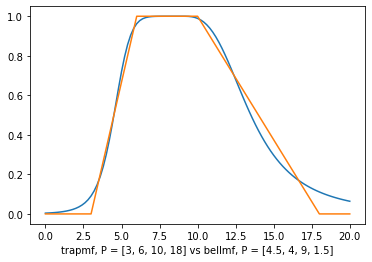

In [9]:
# This code will only run correctly if Question 3 above is answered correctly (MODIFIED - DONE)
y = bellmf(x, [4.5, 4, 9, 1.5])
plt.plot(x, y)
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('trapmf, P = [3, 6, 10, 18] vs bellmf, P = [4.5, 4, 9, 1.5]')
plt.show()

# 6. Storing Membership function type and parameters (DONE)

We need a way to store the type of membership functions, the parameters, and a generic function to evaluate memership function. Unfortunately the fismf class in Python Fuzzy Logic library is not working well, probably coded for an older version of Python. So we have to fix the class definition.

In [10]:
# This class replaces the fismf function in the Python Fuzzy Logic Library.
# This way of coding is highly not recommended, as the attributes of the class is not defined.
class fismf(object):
    def __init__(self, **attrs):
        self.__dict__.update(**attrs)
    def __getattr__(self, attr):
        return self.__dict__.get(attr, None)

The following code initializes a trapezoidal membership function with parameters, and plots it.

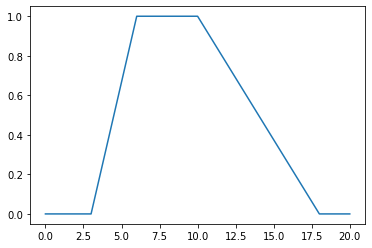

In [11]:
mymf = fismf(Type = 'trapmf', Parameters = [3, 6, 10, 18])
plt.plot(x, fz.evalmf.evalmf(mymf, x))

<font color='red'>Question 4(a)</font>: Given a value z=4, find the Fuzzy Membership function value from mymf. <font color='red'>(0.5 mark)</font>

In [12]:
# Enter Code for Question 4(a) here. Code does not run without modification (MODIFIED - DONE)
z = 4
uz = fz.evalmf.evalmf(mymf, z)
print(uz)

[0.33333333]


<font color='red'>Question 4(b)</font>: Now change mf to another type of membership function with different parameters and plot the membership function. <font color='red'>(0.5 mark)</font>

[0.14285714]


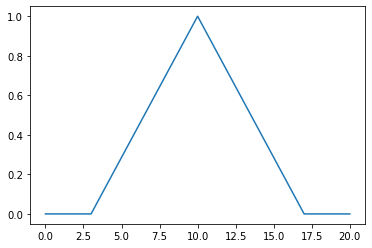

In [13]:
# Enter code for question 4(b) here. No code provided for you (MODIFIED - DONE)
mymf = fismf(Type = 'trimf', Parameters = [3, 10, 17])
plt.plot(x, fz.evalmf.evalmf(mymf, x))
z = 4
uz = fz.evalmf.evalmf(mymf, z)
print(uz)

# 7. Learning Vector Quantization (LVQ) algorithm (DONE)

The Learning Vector Quantization (LVQ) algorithm is a lot like k-Nearest Neighbors. k-Nearest Neighbors need to keep a large database of training examples in order to make predictions. The LVQ  algorithm addresses uses a much smaller subset of patterns to represent the training data. These are called codebooks. We need to compute distances between the codebooks and the examples.

Thus we needed is a function to calculate the distance between two samples or rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is using the Euclidean distance measure. 

The equation of Euclidean distance between vectors *x* and *y* with length *n* is defined as

\begin{equation*}
\sqrt{\sum_{k=1}^n (x_k - y_k)^2}
\end{equation*}

In other words, Euclidean distance is the square root of the sum of the squared differences between the two vectors. 


In [14]:
# A function to calculate the Euclidean distance between two vectors
def euclidean_distance2(x1, x2):
    dist = 0.0
    for i in range(len(x1)-1):
        dist = dist + (x1[i] - x2[i])**2
    return sqrt(dist)

# A more effective way
def euclidean_distance(x1,x2):   
    return np.sqrt(np.sum((x1-x2)**2))

Now create some dataset to look at euclidean distance

Sample 1: [1.2175922  0.56036226]
Sample 2: [1.62863879 2.77830328]
Sample 11: [-2.44851572 -2.92986553]
Sample 12: [-1.76380919 -1.71145771]


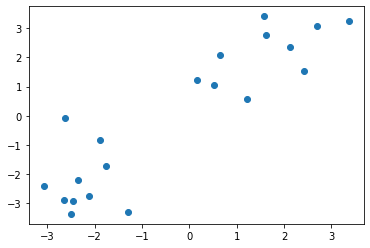

In [15]:
dataset = np.random.randn(20,2)
dataset[1:10]+=(+2)
dataset[10:20]+=(-2)
print("Sample 1:",dataset[0])
print("Sample 2:",dataset[1])
print("Sample 11:",dataset[10])
print("Sample 12:",dataset[11])
plt.scatter(dataset[:,0], dataset[:,1])

Compute the euclidean distance between Sample 1 and Sample 2

In [16]:
dist = euclidean_distance2(dataset[0],dataset[1])
print("Distance 1:",dist)

Distance 1: 0.411046595057057


In [17]:
dist2 = euclidean_distance(dataset[0],dataset[1])
print("Distance 1:",dist2)

Distance 1: 2.255708682742333


<font color='red'>Question 5(a)</font>: The results are not the same. Which function: euclidean_distance or euclidean_distance2 is wrong? Fix the function that is wrong below. <font color='red'>(0.5 mark)</font>

In [18]:
# Enter code for question 6 here (MODIFIED - DONE)
# euclidean_distance2 is wrong, it didn't loop through all the data samples
def euclidean_distance2(x1, x2):
    dist = 0.0
    for i in range(len(x1)):
        dist = dist + (x1[i] - x2[i])**2
    return sqrt(dist)

dist = euclidean_distance2(dataset[0],dataset[1])
print("Distance 1:",dist)

Distance 1: 2.255708682742333


# 8. Find the Winner (DONE)
The Winner weight, or so called the winning codebook, also called Best Matching Vector, is the weight or codebook that is most similar to a new piece of data.

To identify the Winner for a new piece of data within a dataset we must first calculate the distance between each weight or codebook to the new piece of data. We can do this using our distance function above.

Once distances are calculated, we must sort all of the weights or codebooks by their distance to the new data. We can then return most similar weight or codebook vector with the smallest distance to the new data.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the winner.

Below is a function named get_best_matching_unit() that implements this.

In [19]:
# Locate the best matching unit
def find_winner(weights, test_sample):
    distances = list()
    for weight_index, weight in enumerate(weights):
        dist = euclidean_distance(weight, test_sample)
        distances.append((weight_index, dist))
    distances.sort(key=lambda tuple: tuple[1])
    return distances[0][0]

The euclidean_distance() function in section 1 is used to calculate the distance between each weight or codebook with the new test_sample.

The list of codebook vectors and distance tuples is sorted where a custom key is used ensuring that the second item in the tuple (tuple[1]) is used in the sorting operation.

Finally, the most similar weight or codebook vector is returned as the winner.

We can test this function with the small dataset prepared in section 1.

In [20]:
winner=find_winner([dataset[i] for i in [0,10]],dataset[0])
print("Winner :",winner)
winner=find_winner([dataset[i] for i in [0,10]],dataset[10])
print("Winner :",winner)

Winner : 0
Winner : 1


<font color='red'>Question 5(b)</font>: How many weights or codebooks were passed to the function find_winner? <font color='red'>(0.25 mark)</font>

2 per function call (dataset[0] and dataset[10] were the weights)

<font color='red'>Question 5(c)</font>: How many test samples were passed to the function find_winner? <font color='red'>(0.25 mark)</font>

1 per function call (first function called dataset[0] and second function called dataset[10] as test samples)

# 9. Initialize LVQ Weight Vectors (DONE)

Before we train a set of weights or codebook vectors, we have to initialize the weights.

We can initialize it with patterns constructed from random features in the training dataset. This is one way to initialize it. Another way is to randomize the weights to a certain range of the input dataset instead of using one of the samples. There are advantages and disadvantages to different ways of initializing the weights.

Below is a function named random_weight() that picks a random sample from the training data.

In [21]:
# Assign a random codebook vector from the training data
def random_weight(traindata):
    n_records = len(traindata)    
    weight = traindata[randrange(n_records)]
    return weight

We can test this function with the small dataset prepared in section 1.

In [24]:
weight=random_weight(dataset)
print("Weight:",weight)

Weight: [2.42713286 1.53613043]


In [23]:
# this cell is to list the data samples to answer questions 6(a) and 6(b)
for i in range(len(dataset)):
  print(f'dataset {i} is {dataset[i]}')

dataset 0 is [1.2175922  0.56036226]
dataset 1 is [1.62863879 2.77830328]
dataset 2 is [0.52835664 1.05302984]
dataset 3 is [3.36450676 3.23508242]
dataset 4 is [2.42713286 1.53613043]
dataset 5 is [2.1209974 2.3683752]
dataset 6 is [0.16665837 1.2229133 ]
dataset 7 is [0.64654404 2.09632968]
dataset 8 is [2.68954061 3.06626581]
dataset 9 is [1.5765608  3.41309517]
dataset 10 is [-2.44851572 -2.92986553]
dataset 11 is [-1.76380919 -1.71145771]
dataset 12 is [-2.63503636 -0.08147836]
dataset 13 is [-2.6532495  -2.91184247]
dataset 14 is [-1.87738324 -0.84177707]
dataset 15 is [-2.11885299 -2.76264124]
dataset 16 is [-3.0660041  -2.42622184]
dataset 17 is [-2.34219938 -2.22530907]
dataset 18 is [-1.30463148 -3.31373027]
dataset 19 is [-2.49741777 -3.37305242]


<font color='red'>Question 6(a)</font>: Which sample is selected as the weight? Give the index of the sample selected. <font color='red'>(0.5 mark)</font>

index number 3

<font color='red'>Question 6(b)</font>: If you run again, what happens? <font color='red'>(0.5 mark)</font>

a different sample is selected as the weight (index number 4)

# 10. Training LVQ Weight Vectors (DONE)

After the weights are initialized to a random set, they have to be trained using the training data. This is done iteratively.

The training process is repeated for a fixed number of epochs, or so called exposures of the training data. In an epoch, each training sample is used to update the set of weight or codebook vectors.

For a training pattern, a winner vector is updated to move it closer or further away. A winner is found for each training pattern and only this winner is updated. The difference between the training pattern and the winner is calculated as the error. 

The amount that the winner is adjusted is controlled by a learning rate. This is the amount of change made to the winner. For example, a learning rate of 0.3 means that the winner are only moved by 30% of the error or difference between the training data and the winner.

The learning rate is also adjusted so that it has maximum effect in the first epoch and the effect lessen as training continues until it has a minimal effect in the final epoch. This is called a linear decay learning rate commonly used in artificial neural networks.

Below is a function named train_weights() that implements the procedure for training a set of weight vectors given a training dataset.

The function takes 3 additional arguments to the training dataset, the number of weights or codebook vectors to create and train, the initial learning rate and the number of epochs.

The function keeps track of the sum squared error each epoch and prints a message showing the epoch number, effective learning rate and sum squared error score. This is helpful when debugging the training function or the specific configuration for a given prediction problem. The random_weight function is used to initialize the codebook vectors and the find_winner function is used to find the winner for each training pattern within an epoch.


In [25]:
# Train a set of codebook vectors
def train_LVQ(traindata, weights, lrate, epochs):    
    print("Weights:",weights)
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in traindata:
            winner_index = find_winner(weights, row)
            #print("Winner:",winner)
            error = (row - weights[winner_index])
            sum_error = sum_error + sqrt(sum(error**2))
            # This line has an error in changing the original dataset 
            # weights[winner_index] += rate * error
            weights[winner_index] = weights[winner_index] + rate * error
            #print("Winner:",winner)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return weights


Run this to train a set of 2 weight vectors for 20 epochs with an initial learning rate of 0.3. The details are printed each epoch and the set of 2 codebook vectors learned from the training data is displayed.

We can see that the changes to learning rate meet our expectations explored above for each epoch. We can also see that the sum squared error each epoch does continue to drop at the end of training and that there may be an opportunity to tune the example further to achieve less error

Initial weights: [array([0.52835664, 1.05302984]), array([0.16665837, 1.2229133 ])]
Weights: [array([0.52835664, 1.05302984]), array([0.16665837, 1.2229133 ])]
>epoch=0, lrate=0.300, error=30.232
>epoch=1, lrate=0.285, error=25.447
>epoch=2, lrate=0.270, error=25.145
>epoch=3, lrate=0.255, error=25.010
>epoch=4, lrate=0.240, error=24.878
>epoch=5, lrate=0.225, error=24.745
>epoch=6, lrate=0.210, error=24.611
>epoch=7, lrate=0.195, error=24.475
>epoch=8, lrate=0.180, error=24.337
>epoch=9, lrate=0.165, error=24.196
>epoch=10, lrate=0.150, error=24.053
>epoch=11, lrate=0.135, error=23.907
>epoch=12, lrate=0.120, error=23.758
>epoch=13, lrate=0.105, error=23.608
>epoch=14, lrate=0.090, error=23.459
>epoch=15, lrate=0.075, error=23.313
>epoch=16, lrate=0.060, error=23.169
>epoch=17, lrate=0.045, error=23.022
>epoch=18, lrate=0.030, error=22.870
>epoch=19, lrate=0.015, error=22.711
Weights: [array([1.63882166, 2.20381445]), array([-2.26307328, -2.32849897])]


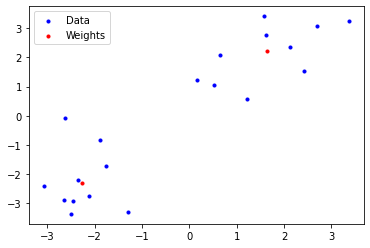

In [26]:
n_weights = 2
weights = [random_weight(dataset) for i in range(n_weights)]
seed(1)
learn_rate = 0.3
n_epochs = 20
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

Now what happens if we change the random initialization of weights

Initial weights: [array([1.2175922 , 0.56036226]), array([1.62863879, 2.77830328])]
Weights: [array([1.2175922 , 0.56036226]), array([1.62863879, 2.77830328])]
>epoch=0, lrate=0.300, error=27.531
>epoch=1, lrate=0.285, error=25.609
>epoch=2, lrate=0.270, error=25.149
>epoch=3, lrate=0.255, error=25.011
>epoch=4, lrate=0.240, error=24.878
>epoch=5, lrate=0.225, error=24.745
>epoch=6, lrate=0.210, error=24.611
>epoch=7, lrate=0.195, error=24.475
>epoch=8, lrate=0.180, error=24.337
>epoch=9, lrate=0.165, error=24.196
>epoch=10, lrate=0.150, error=24.053
>epoch=11, lrate=0.135, error=23.907
>epoch=12, lrate=0.120, error=23.758
>epoch=13, lrate=0.105, error=23.608
>epoch=14, lrate=0.090, error=23.459
>epoch=15, lrate=0.075, error=23.313
>epoch=16, lrate=0.060, error=23.169
>epoch=17, lrate=0.045, error=23.022
>epoch=18, lrate=0.030, error=22.870
>epoch=19, lrate=0.015, error=22.711
Weights: [array([-2.26307328, -2.32849897]), array([1.63882166, 2.20381445])]


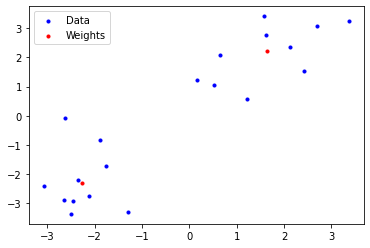

In [27]:
weights = [dataset[i] for i in [0,1]]
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

<font color='red'>Question 7(a)</font>: What does the initialization of weights impact the LVQ algorithm? <font color='red'>(0.5 mark)</font>

The initial 'weights' can be seen as the initial 'center' of the neighbourhoods to train the algorithm. If the initial weights already 'split' the neighbourhoods clearly, the initial error will already be small and finding the final weights can be done in a smaller number of epoch. However, if the initial weights are selected close to each other and close to the corner of the map, the initial error will be very large and finding the final weights will take a larger number of epoch, where the final weights may not converge if there is insufficient epochs.

<font color='red'>Question 7(b)</font>: What other parameters also affect the LVQ algorithm? Show with code. <font color='red'>(0.5 mark)</font>

1) Learning rate. The learning rate affects the speed at which the algorithm reduces the error. In the provided algorithm, the learning rate decreases linearly with the number of epoch, but may be improved with an exponential decay rate (decreases more at the beginning instead as the initial errors would be fairly large compared to those after a number of epoch

2) Number of epoch. With more iterations, the algorithm will always try to find a better solution that gives a smaller error, assuming that there is no additional rule (e.g. convergence) to break out of the iteration loop

3) Number of weights (AKA number of clusters/neighbourhoods). An different number of weights would obviously change the output of the algorithm drastically

Initial weights: [array([1.2175922 , 0.56036226]), array([1.62863879, 2.77830328])]
Weights: [array([1.2175922 , 0.56036226]), array([1.62863879, 2.77830328])]
>epoch=0, lrate=0.300, error=27.531
>epoch=1, lrate=0.290, error=25.648
>epoch=2, lrate=0.280, error=25.232
>epoch=3, lrate=0.270, error=25.138
>epoch=4, lrate=0.260, error=25.051
>epoch=5, lrate=0.250, error=24.963
>epoch=6, lrate=0.240, error=24.876
>epoch=7, lrate=0.230, error=24.788
>epoch=8, lrate=0.220, error=24.700
>epoch=9, lrate=0.210, error=24.611
>epoch=10, lrate=0.200, error=24.522
>epoch=11, lrate=0.190, error=24.431
>epoch=12, lrate=0.180, error=24.340
>epoch=13, lrate=0.170, error=24.248
>epoch=14, lrate=0.160, error=24.154
>epoch=15, lrate=0.150, error=24.059
>epoch=16, lrate=0.140, error=23.964
>epoch=17, lrate=0.130, error=23.867
>epoch=18, lrate=0.120, error=23.769
>epoch=19, lrate=0.110, error=23.670
>epoch=20, lrate=0.100, error=23.571
>epoch=21, lrate=0.090, error=23.473
>epoch=22, lrate=0.080, error=23.375

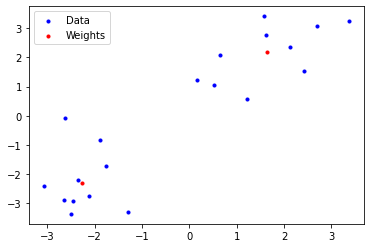

In [28]:
# Enter code for Question 7(b) here (MODIFIED - DONE)
# Assuming the number of weights remains the same, and the algorithm doesn't change (same linear decay
# of the learning rate), only the number of epoch parameter was changed here. For fair comparison, 
# this code uses the first 2 dataset as the initial weights, just like the code cell before this

weights = [dataset[i] for i in [0,1]]
print("Initial weights:",weights)
n_epochs = 30
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

# It can be seen that increasing the number of epoch from 20 to 30 did reduce the error, but not by
# much. This shows that the error is near convergence and increasing the number of epoch would not 
# improve the solution by a lot, and is probably not worth the increase in computational cost.

# 11. Generating Fuzzy Membership functions using LVQ algorithm

In the example above, there are 2 winning vectors, each vector has 2 dimensions. This can be view as 2 inputs with 2 membership functions each.


<font color='red'>Question 8</font>: Use the winning vectors to generate triangle fuzzy membership functions for dimension 1. Plot the 2 membership functions, one for each winning vector on the same plot using different colors. <font color='red'>(1 mark)</font>

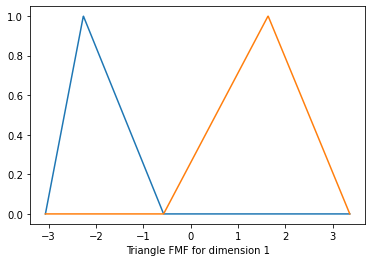

In [29]:
# Enter code for Question 8 here (MODIFIED - DONE)

# get range to plot
dim1_max = np.max(dataset[:,0])
dim1_min = np.min(dataset[:,0])
x = np.linspace(dim1_min, dim1_max, 1001)

# sort nweights by dim1 for order
nweights = nweights[nweights[:, 0].argsort()]

# get center of triangular fmf from nweights
b = np.sort(nweights[:,0])

# initialize a and c
a = np.zeros((len(b),1))
c = np.zeros((len(b),1))

# get median value of dataset
dim1_med = np.median(dataset[:,0])

# set a[0] to be minimum value of dataset,
# c[0] and a[1] to be the median value of dataset, 
# and c[1] to be maximum value
a[0] = dim1_min
c[0] = dim1_med
a[1] = dim1_med
c[1] = dim1_max

# plot triangular FMF
fmf_1 = fz.trimf(x, [a[0], b[0], c[0]])
fmf_2 = fz.trimf(x, [a[1], b[1], c[1]])
plt.plot(x, fmf_1)
plt.plot(x, fmf_2)
plt.xlabel('Triangle FMF for dimension 1')
plt.show()

<font color='red'>Question 9</font>: Use the winning vectors to generate Gaussian membership functions for dimension 2. Plot the 2 membership functions, one for each winning vector on the same plot using different colors. <font color='red'>(1 mark)</font>

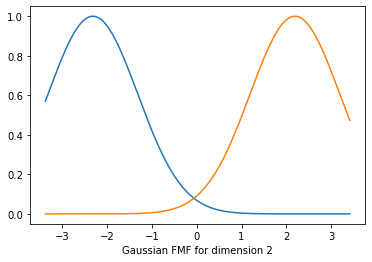

In [30]:
# Enter code for Question 9 here (MODIFIED - DONE)

# get range to plot
dim2_max = np.max(dataset[:,1])
dim2_min = np.min(dataset[:,1])
x = np.linspace(dim2_min, dim2_max, 1001)

# sort nweights by dim2 for order
nweights = nweights[nweights[:, 1].argsort()]

# get center of triangular fmf from nweights and set width
b = nweights[:,1]
width = 1

# plot gaussian FMF
fmf_1 = fz.gaussmf(x, [width, b[0]])
fmf_2 = fz.gaussmf(x, [width, b[1]])
plt.plot(x, fmf_1)
plt.plot(x, fmf_2)
plt.xlabel('Gaussian FMF for dimension 2')
plt.show()


<font color='red'>Question 10</font>. Add code to modify the triangular membership function in question 8 so that they satisfy coverage, normalized, convex and ordered. Hint: Refer to lecture notes on interpretability of Fuzzy membership functions. <font color='red'>(1 mark)</font>

a,b,c of Triangle FMF 1: -3.066004098840619, -2.2646298337787942, -0.5689865555850742
a,b,c of Triangle FMF 2: -0.5689865555850742, 1.6385638332355748, 3.3645067637949264


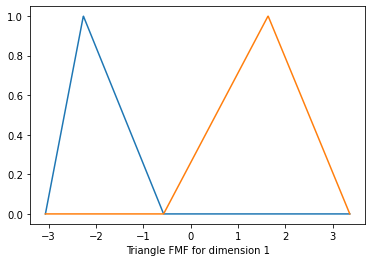

In [31]:
# Enter code for Question 10 here

# get range to plot
dim1_max = np.max(dataset[:,0])
dim1_min = np.min(dataset[:,0])
x = np.linspace(dim1_min, dim1_max, 1001)

# sort nweights by dim1 for order
nweights = nweights[nweights[:, 0].argsort()]

# get center of triangular fmf from nweights
b = nweights[:,0]

# get number of nweights, AKA number of clusters
n_fmf = len(nweights)

# get the cluster index that the sample belong to, based on euclidean distance from nweights
eucl_dist = np.zeros((len(dataset), n_fmf))
for i in range(len(dataset)):
    for j in range(n_fmf):
        eucl_dist[i,j] = np.sqrt(((dataset[i,:] - nweights[j,:])**2).sum())
cluster_idx = np.argmin(eucl_dist, axis=1)

# initialize a, c, and fmf
a = np.zeros(n_fmf)
c = np.zeros(n_fmf)
fmf = np.zeros((n_fmf,1001))

# repeat, for each cluster i,
for i in range(n_fmf):
    # get index of samples which belong to cluster i
    dataset_idx = np.where(cluster_idx==i)
    val = np.zeros(len(dataset_idx[0]))
    
    # get a list of the samples' dim1 values
    for j in range(len(dataset_idx[0])):
        val[j] = dataset[dataset_idx[0][j],0]
    
    # set a[i] and c[i] to be the min and max value from the cluster i
    a[i] = min(val)
    c[i] = max(val)
    
# adjust a[i!=0] and c[i!=(n_fmf-1)] so that they 'meet' at the bottom of the triangles, to ensure coverage
for i in range(n_fmf):
    if (i==0):
        c[i] = (a[i+1] + c[i]) / 2
    elif (i!=(n_fmf-1)):
        a[i] = c[i-1]
        c[i] = (a[i+1] + c[i]) / 2
    else:
        a[i] = c[i-1]
    print(f'a,b,c of Triangle FMF {i+1}: {a[i]}, {b[i]}, {c[i]}')
    fmf[i] = fz.trimf(x, [a[i], b[i], c[i]])
    plt.plot(x, fmf[i])

plt.xlabel('Triangle FMF for dimension 1')
plt.show()

# this code should work for variable number of nweights (AKA number of clusters)
# and ensures coverage and order